In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay

In [2]:
# read csv file
df = pd.read_csv('water_potability.csv')

In [3]:
# data profiling and analysis

pd.set_option('display.max_columns', 20)
print(df.head())
print(df.info())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  -

In [4]:
pd.set_option('display.max_columns', 15)
print(df.describe().transpose())

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  

In [5]:
# check missing data
print(df.isna().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


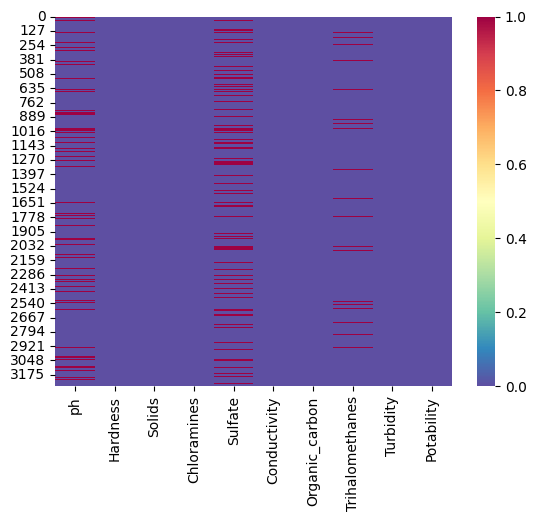

None


In [6]:
sns.heatmap(df.isna(), cmap = 'Spectral_r')
print(plt.show())

In [8]:
print(df.loc[df.isna().any(axis = 1)])

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
8          NaN  118.988579  14285.583854     7.804174  268.646941   
11    7.974522  218.693300  18767.656682     8.110385         NaN   
...        ...         ...           ...          ...         ...   
3266  8.372910  169.087052  14622.745494     7.547984         NaN   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [9]:
# Exploratory data analysis

def hist_plot(feature, palette_color):
    sns.histplot(data = df, x = feature, hue = 'Potability', kde = True, palette = palette_color)
    return plt.show()

In [10]:
def box_plot(feature, palette_color):
    sns.boxplot(data = df, x = 'Potability', y = feature, hue = 'Potability', palette = palette_color,
                flierprops = dict(marker = '+', color = 'red', markersize = 5))

    kurt = kurtosis(df[feature], fisher = False)
    plt.title(f'kurtosis ={round(kurt, 1)}')
    return plt.show()

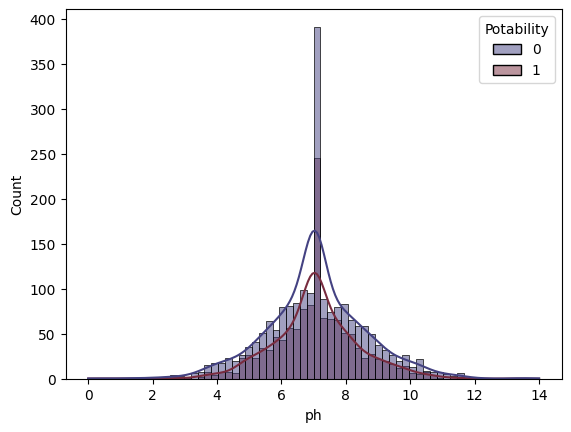

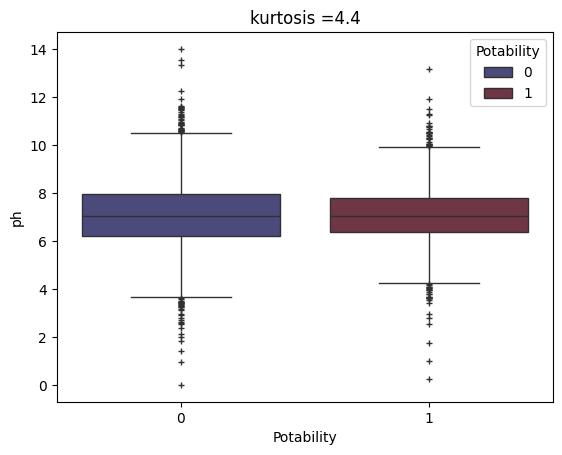

In [13]:
# ph
# ph missing data
'contains NaN so using median to fill data'
df['ph'] = df['ph'].fillna(df['ph'].median())
hist_plot('ph', 'icefire')
box_plot('ph', 'icefire')

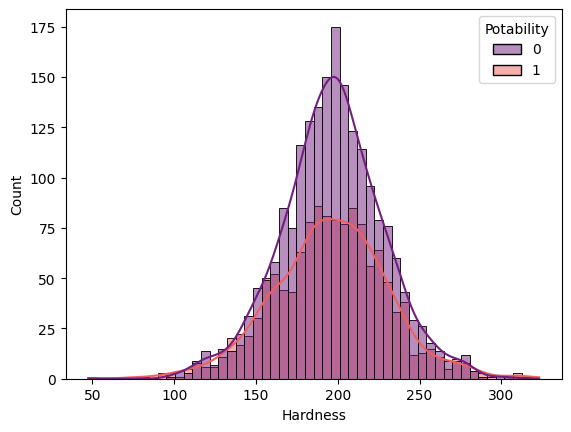

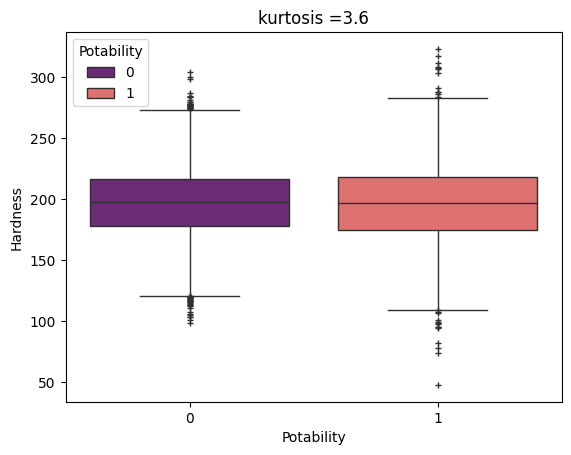

In [14]:
# Hardness
hist_plot('Hardness', 'magma')
box_plot('Hardness', 'magma')

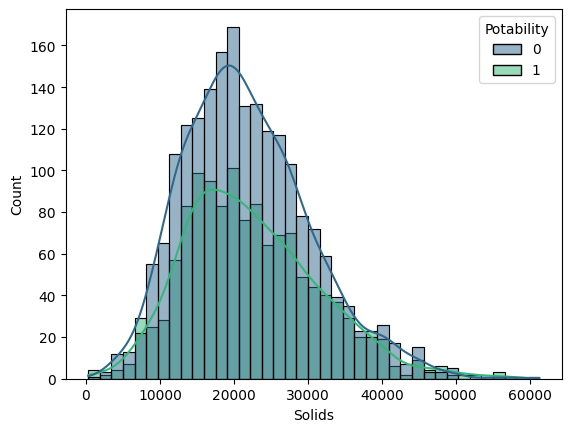

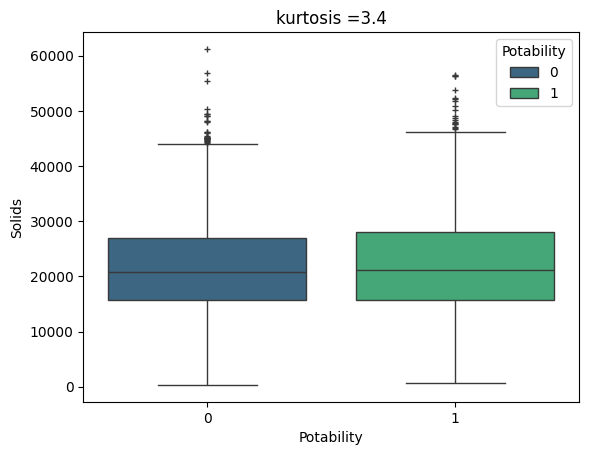

In [15]:
# Solids
hist_plot('Solids', 'viridis')
box_plot('Solids', 'viridis')

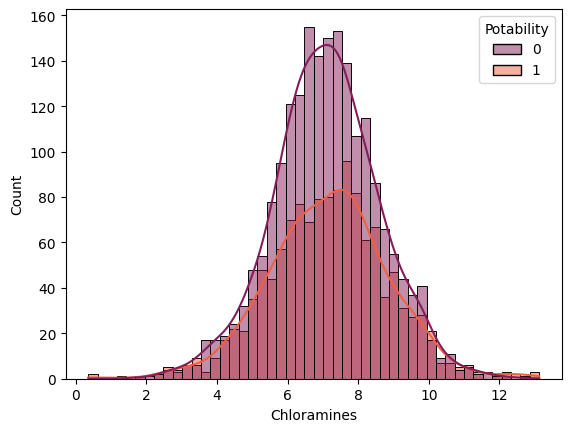

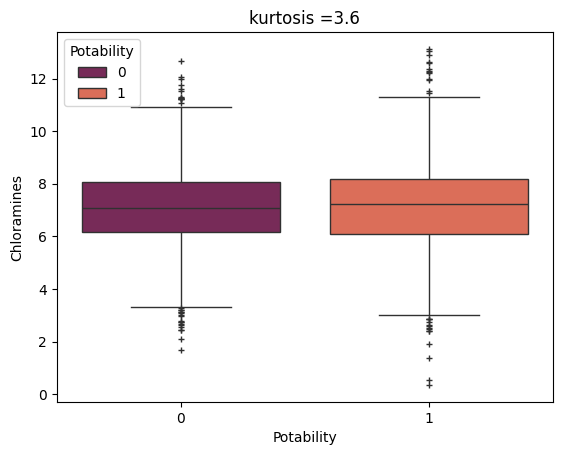

In [16]:
# Chloramines
hist_plot('Chloramines', 'rocket')
box_plot('Chloramines', 'rocket')

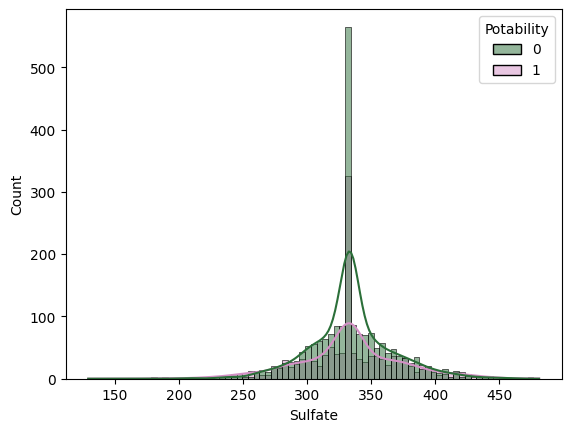

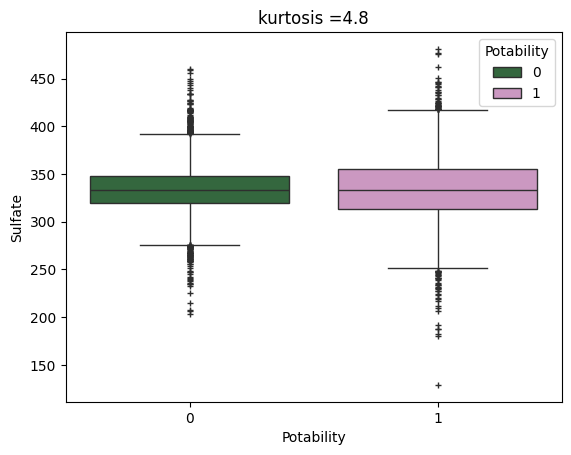

In [17]:
# Sulfate
# sulfate missing data
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
hist_plot('Sulfate', 'cubehelix')
box_plot('Sulfate', 'cubehelix')

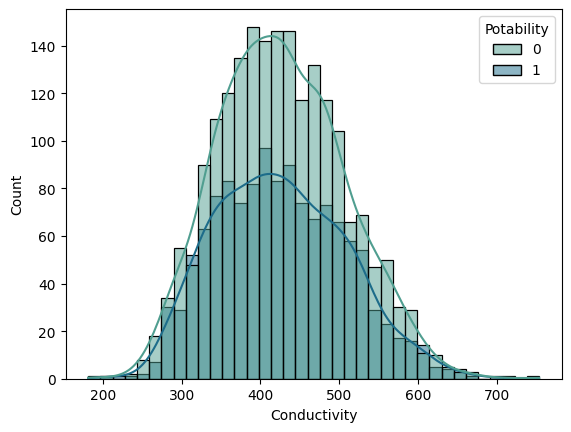

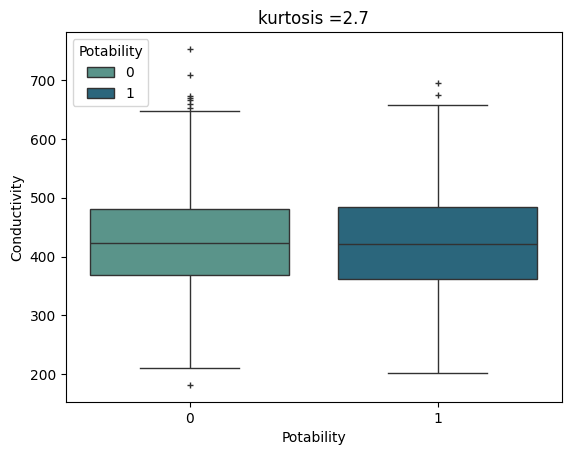

In [18]:
# Conductivity
hist_plot('Conductivity', 'crest')
box_plot('Conductivity', 'crest')

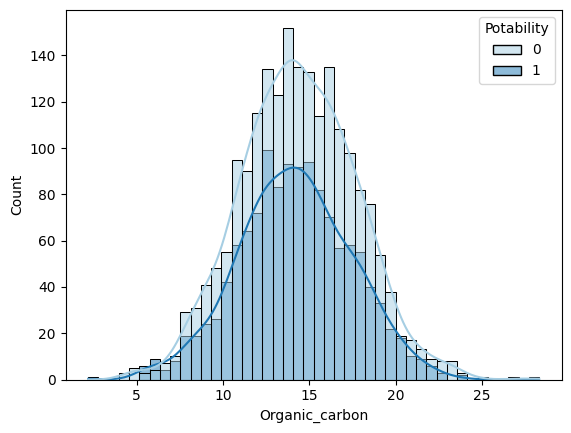

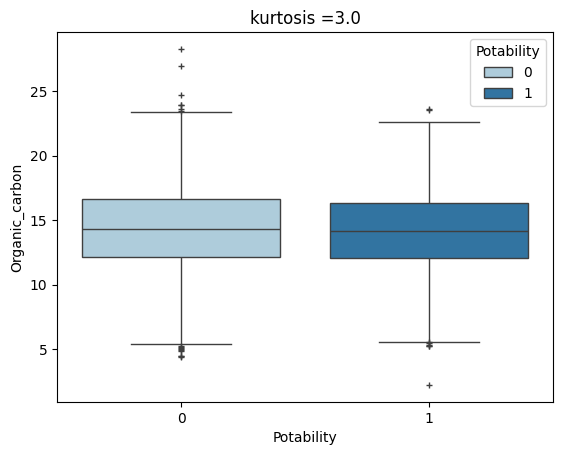

In [19]:
# Organic_carbon
hist_plot('Organic_carbon', 'Paired')
box_plot('Organic_carbon', 'Paired')

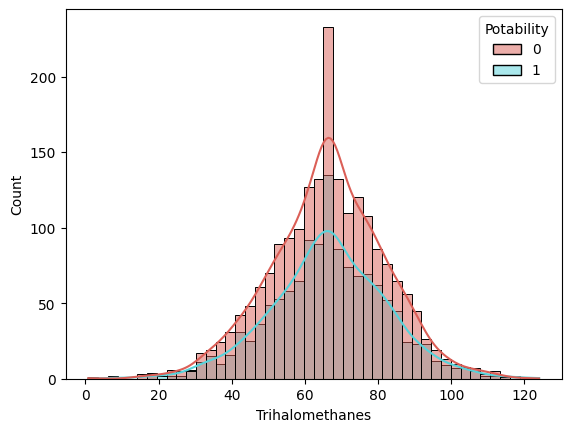

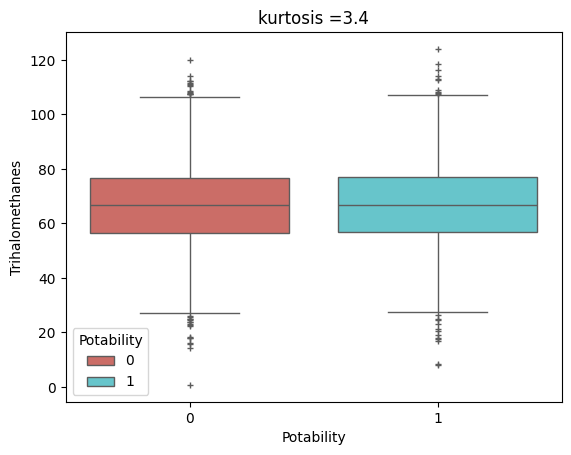

In [20]:
# Trihalomethanes
# Trihalomethanes missing data
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())
hist_plot('Trihalomethanes', 'hls')
box_plot('Trihalomethanes', 'hls')

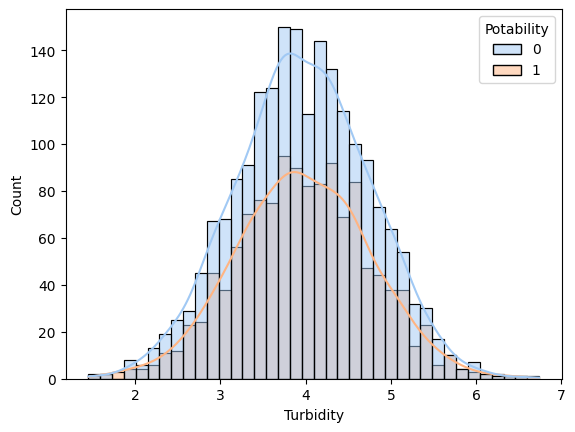

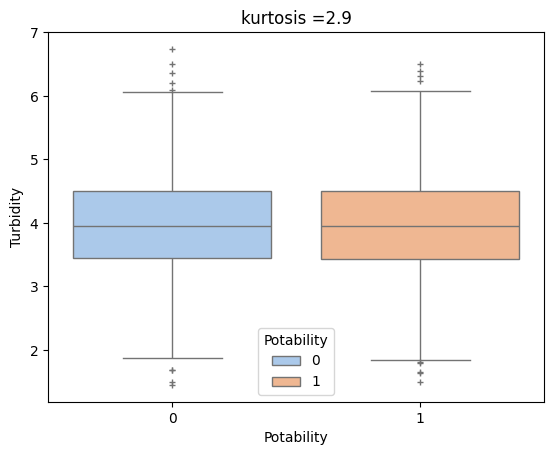

In [21]:
# Turbidity
hist_plot('Turbidity', 'pastel')
box_plot('Turbidity', 'pastel')

<function show at 0x127e5e840>


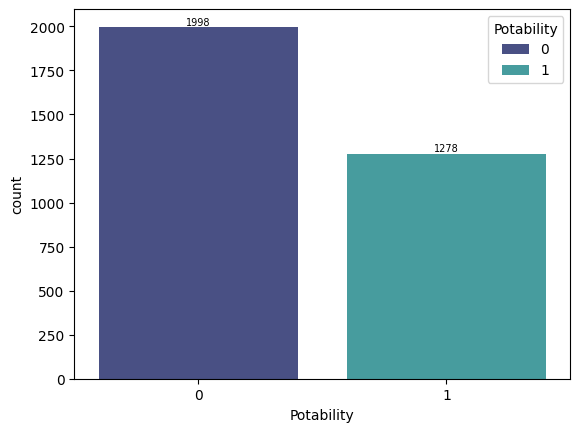

In [23]:
# Potability
count = sns.countplot(data = df, x = 'Potability', hue = 'Potability', palette = 'mako')
count.bar_label(count.containers[0], fontsize = 7)
count.bar_label(count.containers[1], fontsize = 7)
print(plt.show)

In [24]:
# confirming no NaN remains
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


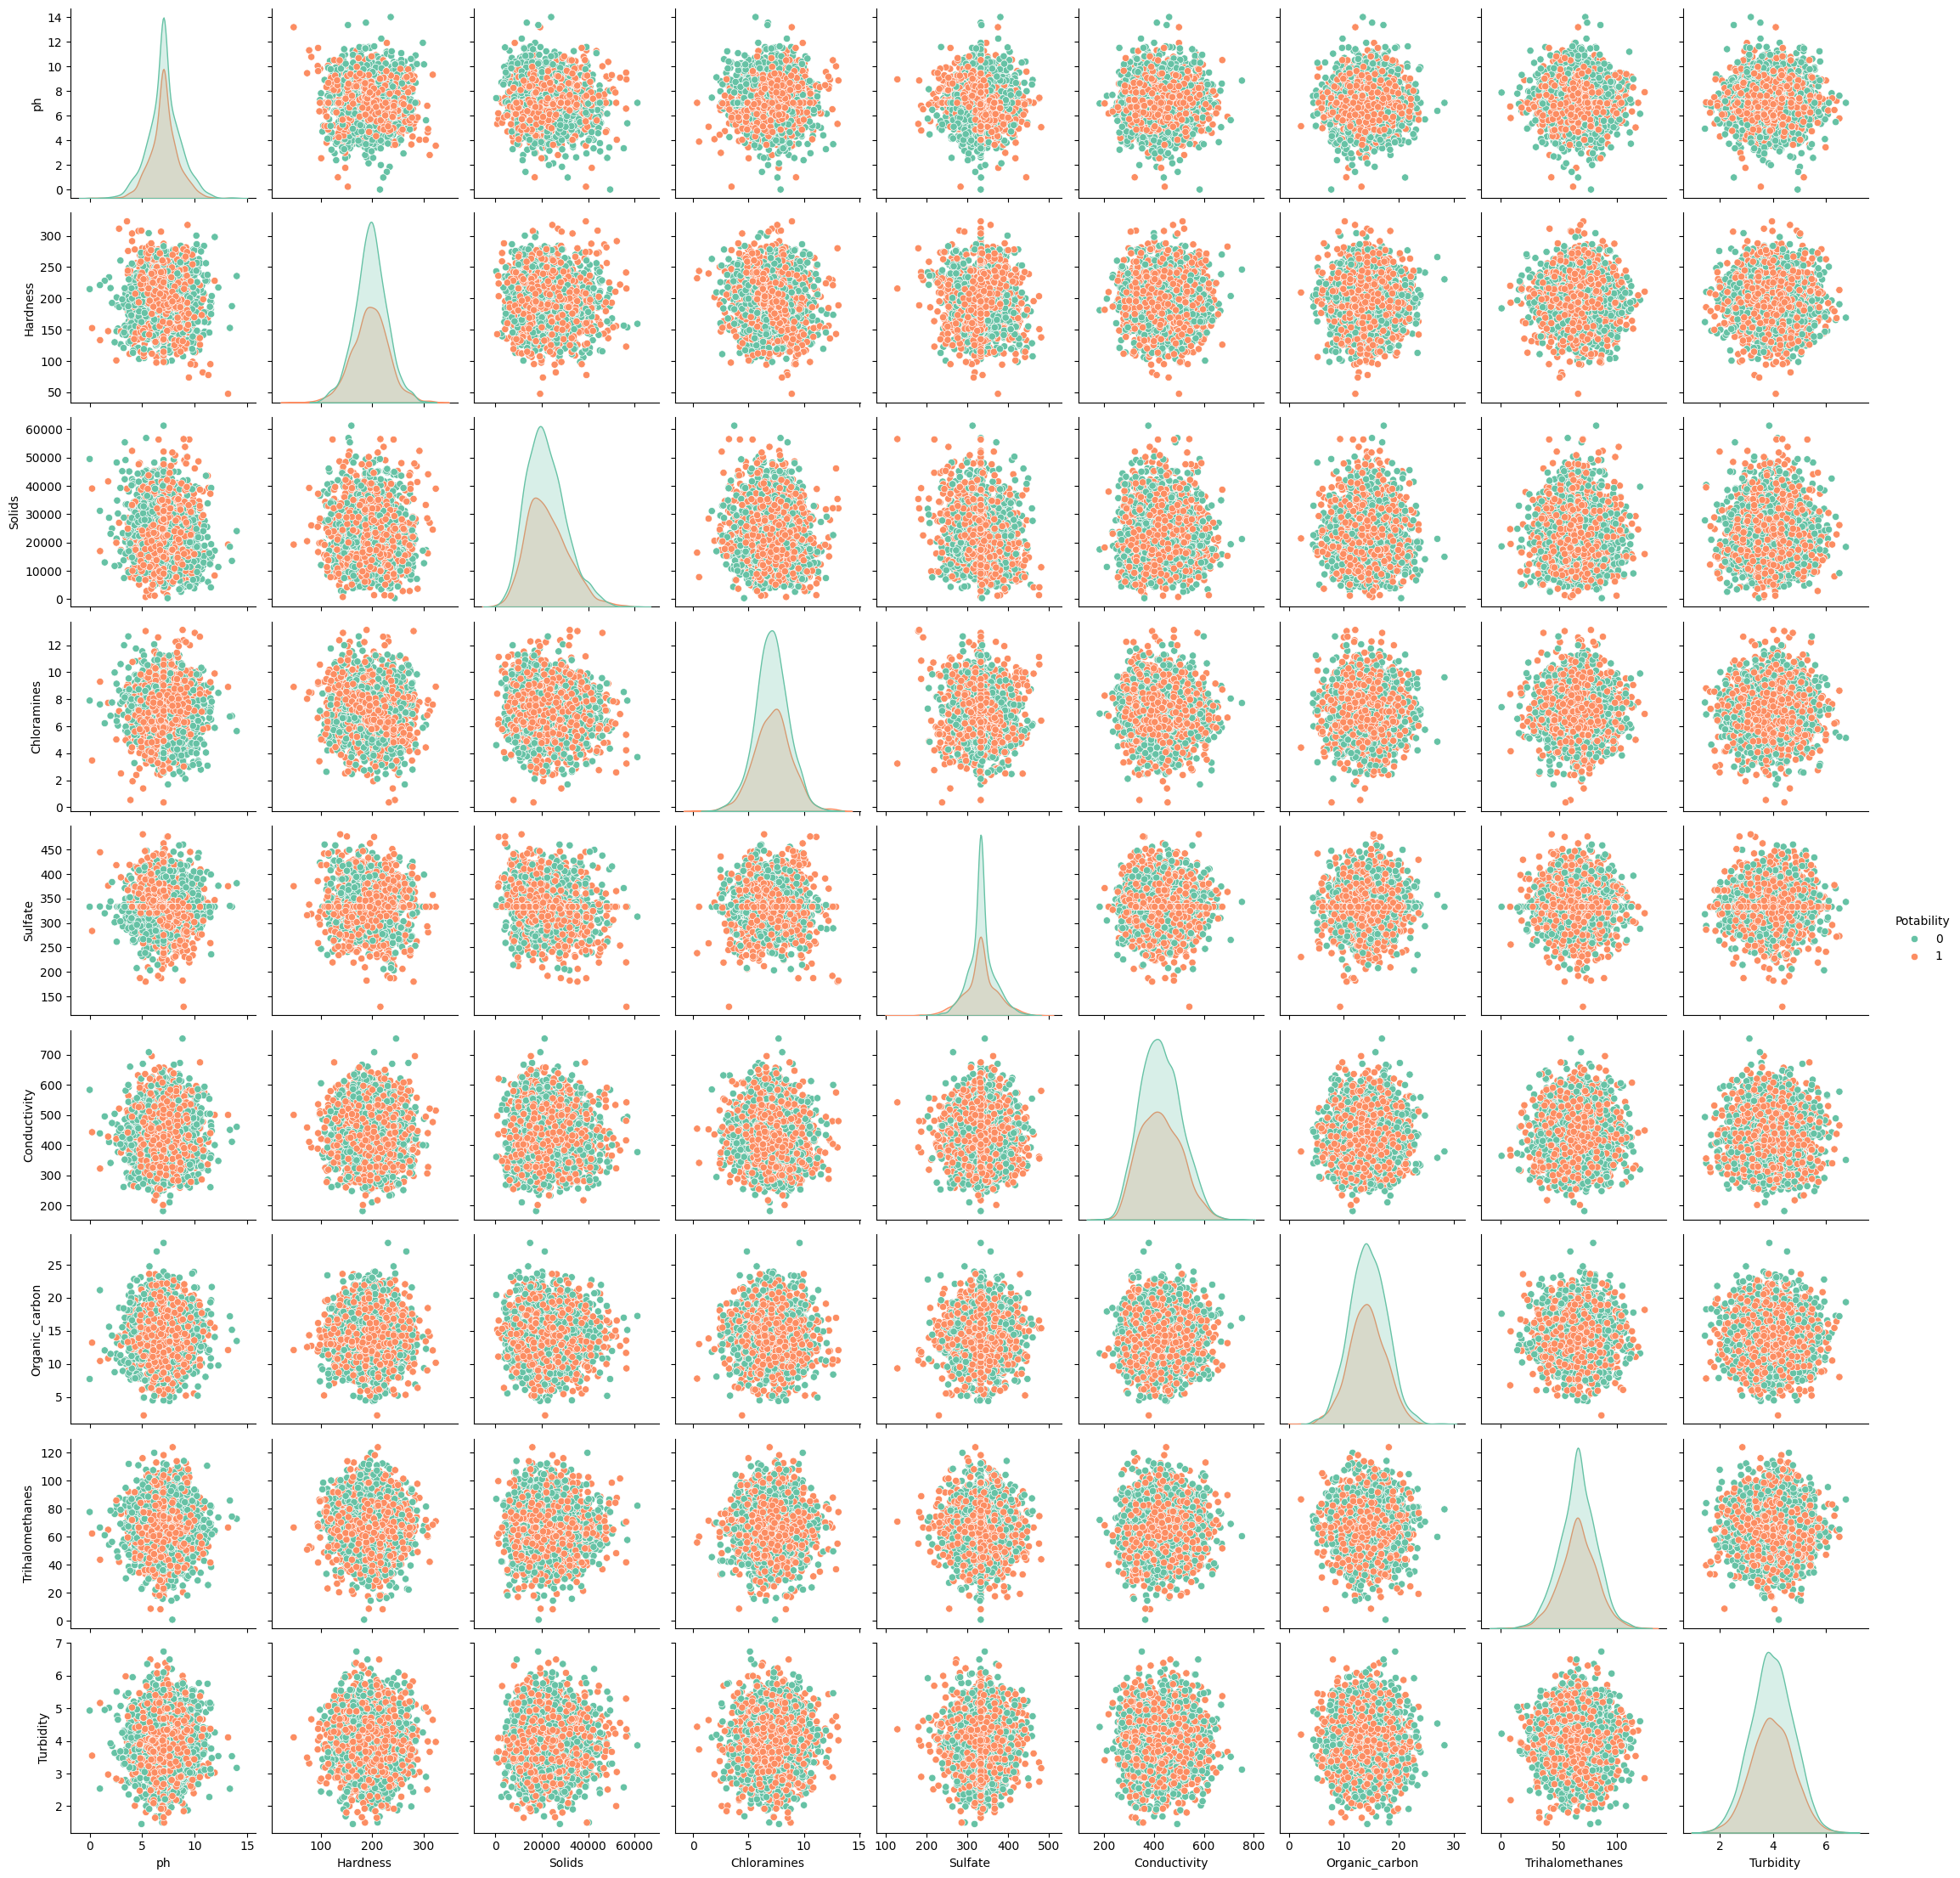

None


In [25]:
# pairplot
sns.pairplot(data = df, hue = 'Potability', palette = 'Set2')
print(plt.show())

In [ ]:
# correlation using heatmap
sns.heatmap(df.corr(numeric_only = True), annot = True, annot_kws = {'size': 7}, cmap = 'Spectral_r')
print(plt.show())

In [27]:
# using z-score to remove outliers less tha z-score 3
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis = 1)]

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3128 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3128 non-null   float64
 1   Hardness         3128 non-null   float64
 2   Solids           3128 non-null   float64
 3   Chloramines      3128 non-null   float64
 4   Sulfate          3128 non-null   float64
 5   Conductivity     3128 non-null   float64
 6   Organic_carbon   3128 non-null   float64
 7   Trihalomethanes  3128 non-null   float64
 8   Turbidity        3128 non-null   float64
 9   Potability       3128 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 268.8 KB
None


In [29]:
# Selecting Independent (X) and dependent (y) variables:
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon',
        'Trihalomethanes', 'Turbidity']]
y = df['Potability']

In [30]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Model Selection: using SVC
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', gamma = 'scale', C = 1.0))])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [33]:
y_pred = model.predict(X_test)

In [34]:
print(f'f1_score = {f1_score(y_true = y_test, y_pred = y_pred)}')
print(f'Accuracy = {accuracy_score(y_true = y_test, y_pred = y_pred)}')

f1_score = 0.42729970326409494
Accuracy = 0.6916932907348243


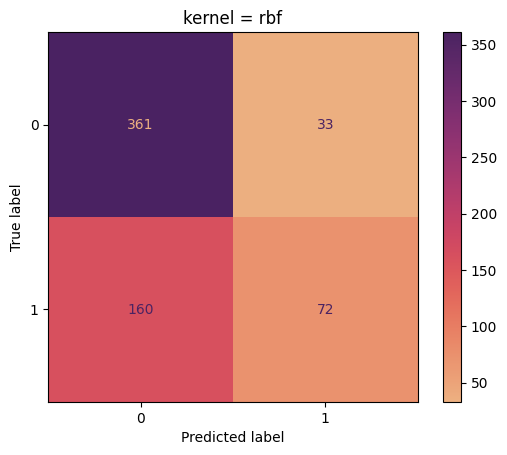

None


In [35]:
# Confusion Matrix Display

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = "flare")
plt.title("kernel = rbf")
print(plt.show())

In [36]:
# Model Selection using Logistic Regression
model = Pipeline([('scaler', StandardScaler()), ('logReg', LogisticRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logReg', LogisticRegression())])

In [37]:
y_pred = model.predict(X_test)

In [38]:
print(f'f1_score = {f1_score(y_true = y_test, y_pred = y_pred)}')
print(f'Accuracy = {accuracy_score(y_true = y_test, y_pred = y_pred)}')

f1_score = 0.0
Accuracy = 0.6293929712460063


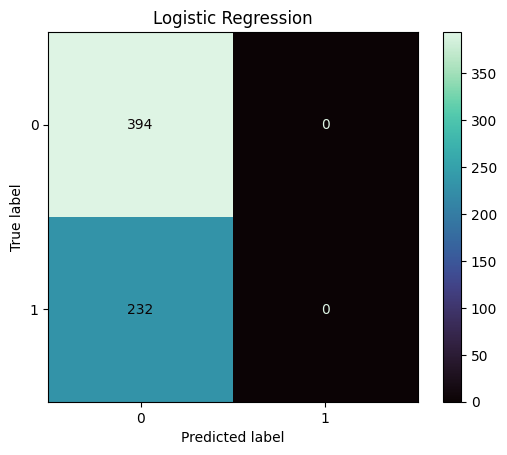

None


In [39]:
# Confusion Matrix Display

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = "mako")
plt.title("Logistic Regression")
print(plt.show())